# Ridge and Lasso Regression

## SWBAT Implement a regularize regression model to help improve the performance of their model on a test set of data.

### Key Questions:

* When should you use a regularized model instead of a normal model?

* How do regularized models differ from normal linear regression?

* How does a Ridge model differ from a Lasso Model?

## Recap of Overfiting a model

![alt text](bias-variance-train-test-error.png)

#### Two common (and somewhat related) ways to think of model complexity:

1. Model complexity as a function of the total number of features with nonzero weights. 

*The more features the more complex the model.*

2. Model complexity as a function of the weights of all the features in the model. 

*The bigger the weights of the features (coefficients) the more complex the model.*


#### How does model complexity change with coefficients?

Recall the way we interpret a regression model $Y = mx + b$: 

With every unit increase in x, the outcome y increase by m unit. Therefore, the bigger the coefficient m is, the more the outcome is subjected to changes in predictor x.

### Cost Function

A cost function is a measure of how good or bad the model is at estimating the relationship of our X and y variables. Usually, it is expressed in the difference between actual values and predicted values. When fitting a model to data, the model finds the coeeficients that will minimize the cost fuction. 

For simple linear regression, the cost function is represented as:
<center> $$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$
    
    
For linear regression with multiple predictors, the cost function is expressed as:
$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2$$

Where k stands for number of predictors at jth term.

## Ridge Rgression (L2 Norm)

The ridge regression applies a penalizing parameter $\lambda$ *slope* $^2$, such that a small bias will be introduced to the entire model depending on the value of $\lambda$, which is called a **hyperparameter**. 

$$ \text{Ridge Cost Function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p m_j^2$$

The ridge regression penalty term contains all of the coefficients squared from the original regression line except for the intercept term. 

Applying such a penalizing parameter to the cost function, the regression model will now try to minimize the combination of both the residual sum of squares **and** the term $\lambda \sum_{j=1}^p m_j^2$. 

Ridge regression works by reducing the magnitude of the coefficient m and therefore reducing the effect the predictors have on the outcome. 




**Ridge regression shrinks the coefficients and it helps to reduce the model complexity**

## Lasso Regression (L1 Norm)
Lasso regression is very similar to Ridge regression except for one difference - the penalty term is not squared but the absolute values of the coefficients muliplied by lambda, expressed by:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

The biggest difference in Ridge and Lasso is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistence in the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed. 

### Hyperparameter tuning

A model **hyperparameter** is a configuration that is external to the model and whose value cannot be estimated from data.


- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

### Choosing the approriate $\lambda$

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

* If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

* If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
pd.set_option('display.max_columns', 300)


### Import our data 

In [2]:
df = pd.read_csv('kc_house_data.csv',index_col='id')
df['yr_old']=2017 - df['yr_built']

target = df.price
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_old']]

### Create Test Train Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17290, 10) (17290,)
(4323, 10) (4323,)


In [4]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)

In [5]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:139254.18635103217
Mean Squared Error:44430411828.45894
Root Mean Squared Error:210785.2267794376


In [6]:
y_pred = lm.predict(X_test)

test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


Mean Absolute Error:143715.20044422447
Mean Squared Error:61547797042.71289
Root Mean Squared Error:248088.2847752245


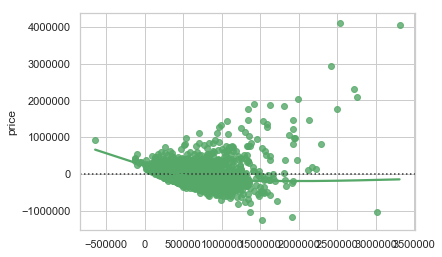

In [7]:
import seaborn as sns
sns.set(style="whitegrid")

#residual plot

sns.residplot(y_pred, y_test, lowess=True, color="g")

In [8]:
lm.coef_

array([-3.63326362e+04,  4.09074273e+04,  1.58641566e+02, -1.70273290e-01,
        3.31287511e+04,  7.03080720e+05,  1.94965639e+04,  1.33594891e+05,
        2.14901209e+01,  3.69198897e+03])

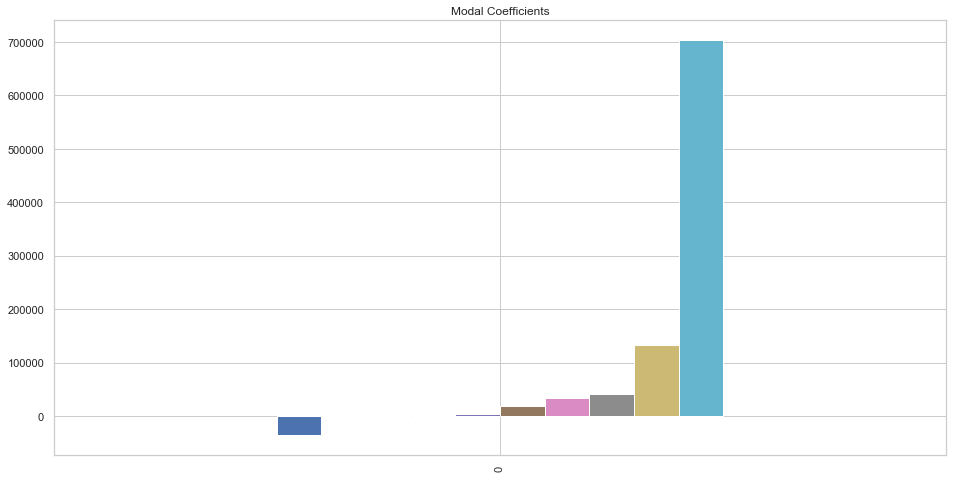

In [9]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = X_test.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [10]:
model_coef

,bedrooms,sqft_lot,sqft_basement,sqft_living,yr_old,condition,floors,bathrooms,grade,waterfront
0,-36332.636198,-0.170273,21.490121,158.641566,3691.988973,19496.563904,33128.751129,40907.427313,133594.890538,703080.720247


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit_transform(features)
df_poly_2= pd.DataFrame(poly_2.transform(features), columns=poly_2.get_feature_names(features.columns))


X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
# print(X_train2.shape, y_train2.shape)
# print(X_test2.shape, y_test2.shape)

lm2 = LinearRegression()
model2 = lm2.fit(X_train2, y_train2)
y_train_pred2 = lm2.predict(X_train2)

# train2_mae = metrics.mean_absolute_error(y_train2, y_train_pred2)

train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))


y_pred2 = lm2.predict(X_test2)

test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

# test2_mae = metrics.mean_absolute_error(y_test2, y_pred2)

print(train_rmse2, test_rmse2)


190825.9979091921 203809.95102128174


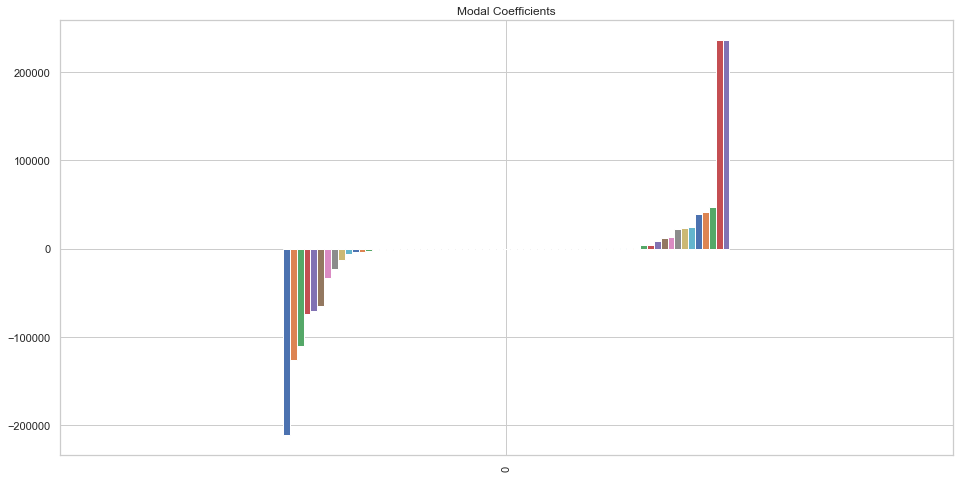

In [12]:
coef2 = pd.DataFrame(data=lm2.coef_ ).T
coef2.columns = X_test2.columns

model_coef2 = coef2.T.sort_values(by=0).T
model_coef2.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [13]:
model_coef2

,grade,floors waterfront,floors,condition,bathrooms,waterfront grade,bedrooms,bathrooms floors,bathrooms^2,yr_old,waterfront yr_old,bedrooms condition,condition^2,bedrooms grade,bathrooms condition,floors yr_old,bathrooms yr_old,sqft_basement,waterfront sqft_basement,sqft_living,sqft_living floors,bedrooms sqft_basement,bedrooms sqft_living,sqft_lot waterfront,sqft_basement yr_old,sqft_basement^2,bathrooms sqft_lot,sqft_lot grade,sqft_lot yr_old,sqft_living sqft_basement,sqft_living sqft_lot,sqft_lot sqft_basement,sqft_lot^2,bedrooms sqft_lot,sqft_living^2,sqft_lot condition,sqft_lot floors,bathrooms sqft_basement,sqft_living yr_old,sqft_lot,bathrooms sqft_living,sqft_living grade,condition sqft_basement,sqft_living condition,yr_old^2,floors sqft_basement,grade sqft_basement,condition yr_old,sqft_living waterfront,bedrooms yr_old,bedrooms^2,grade yr_old,floors grade,bedrooms floors,condition grade,grade^2,bedrooms bathrooms,floors condition,bathrooms grade,bathrooms waterfront,bedrooms waterfront,floors^2,waterfront condition,waterfront^2,waterfront
0,-211633.1945,-126606.069027,-110524.915368,-73541.502916,-70736.012673,-64777.626162,-33752.512608,-22699.586819,-13489.460453,-6308.454552,-4062.383136,-3751.662623,-2891.428827,-1707.641595,-1407.755843,-1261.099296,-618.736378,-170.434017,-111.285397,-75.870945,-23.1841,-14.303961,-3.787709,-1.0298,-0.458304,-0.097472,-0.093254,-0.057879,-0.018048,-0.004164,-0.000369,-0.000168,7.403141e-07,0.008779,0.016647,0.048758,0.109884,0.129724,0.727976,1.546851,7.205828,10.885011,13.882102,17.865481,20.409515,29.952837,34.107005,130.301792,297.724724,351.987876,923.767178,1001.145479,3576.449078,3966.390877,8300.628501,11679.614475,12911.861731,22320.701585,22995.122648,24355.760071,39550.994257,41856.231763,47345.12471,236201.191159,236201.193594


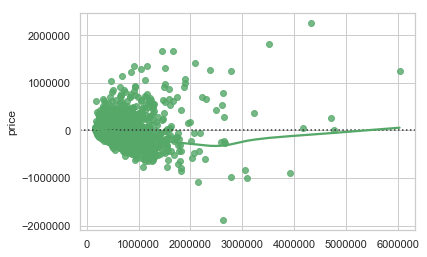

In [14]:
sns.residplot(y_pred2, y_test2, lowess=True, color="g")

## Training a Ridge Model 

RMSE: 216531.56788767173


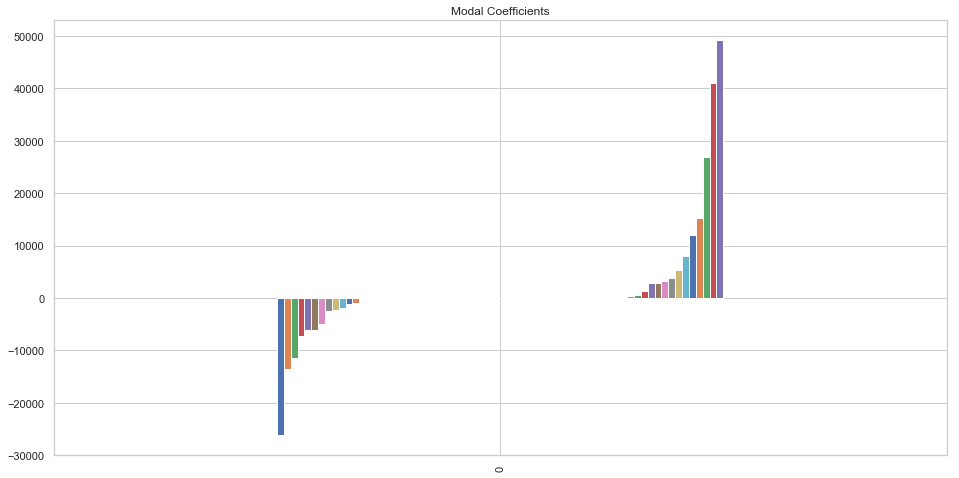

In [15]:
## training the model

ridgeReg = Ridge(alpha=0.1, normalize=True)

ridgeReg.fit(X_train2,y_train2)

y_pred_ridge = ridgeReg.predict(X_test2)

#calculating rmse
RMSE_R01 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', RMSE_R01)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
ridge_coef_01 = pd.DataFrame(data=ridgeReg.coef_).T
ridge_coef_01.columns = X_test2.columns
ridge_coef_01 = ridge_coef_01.T.sort_values(by=0).T
ridge_coef_01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [16]:
ridge_coef_01

,bedrooms,bathrooms,condition,floors,waterfront^2,waterfront,bedrooms floors,bedrooms condition,floors waterfront,waterfront yr_old,bedrooms bathrooms,condition^2,floors yr_old,bathrooms condition,bathrooms yr_old,sqft_basement,bedrooms sqft_basement,sqft_living,sqft_lot waterfront,condition sqft_basement,sqft_basement yr_old,bathrooms sqft_lot,sqft_lot floors,bedrooms sqft_lot,sqft_basement^2,sqft_lot yr_old,sqft_lot sqft_basement,sqft_living sqft_lot,sqft_lot^2,sqft_living^2,sqft_lot grade,sqft_living sqft_basement,sqft_lot condition,sqft_lot,sqft_living yr_old,bedrooms sqft_living,sqft_living floors,sqft_living grade,sqft_living condition,grade sqft_basement,bathrooms sqft_basement,yr_old^2,bathrooms sqft_living,floors sqft_basement,floors condition,waterfront sqft_basement,condition yr_old,bedrooms yr_old,bathrooms floors,sqft_living waterfront,grade yr_old,yr_old,bedrooms^2,bedrooms grade,floors grade,grade^2,bathrooms^2,bathrooms grade,condition grade,floors^2,waterfront grade,waterfront condition,grade,bedrooms waterfront,bathrooms waterfront
0,-26259.821221,-13618.576518,-11492.75471,-7227.512229,-6210.778366,-6210.778366,-4961.760076,-2414.488661,-2390.018588,-1886.087683,-1118.287755,-958.948415,-142.282961,-88.802965,-47.427685,-20.43708,-5.5615,-1.452653,-0.709676,-0.310888,-0.25417,-0.059537,-0.052869,-0.038621,-0.035069,-0.003017,-0.000468,-0.000059,3.846037e-07,0.009582,0.010837,0.011506,0.030716,0.158236,0.434564,1.600782,2.346649,4.273471,4.996774,5.866738,6.440297,7.615821,7.65384,16.869658,45.536849,59.037237,69.026404,109.863155,114.814157,114.836814,128.00164,358.393004,627.46022,1379.307126,2822.601223,2914.316273,3143.134108,3747.508837,5250.869892,7969.685661,11919.368516,15301.28718,26992.917757,41109.941389,49229.500623


RMSE: 234771.97343258912


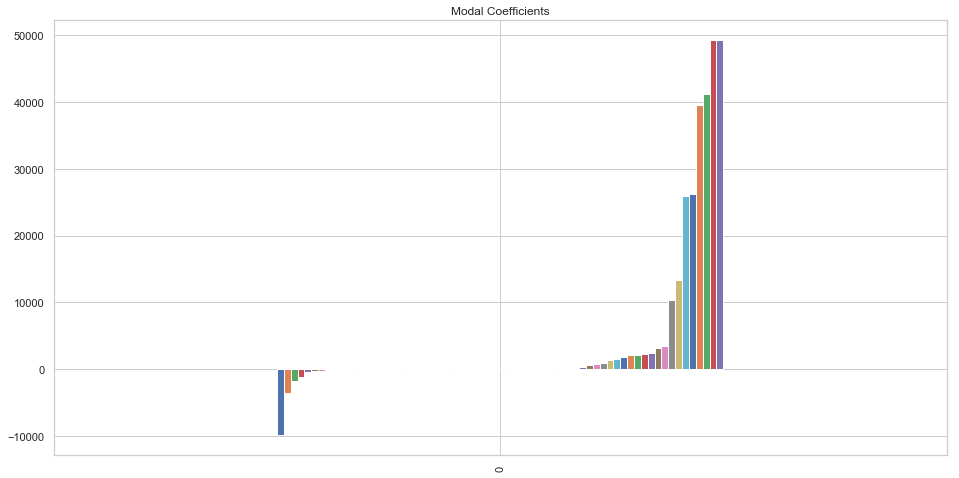

In [17]:
## training the model

ridgeReg1 = Ridge(alpha=1, normalize=True)

ridgeReg1.fit(X_train2,y_train2)

y_pred_ridge1 = ridgeReg1.predict(X_test2)

#calculating mse
RMSE_R1 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge1))

print('RMSE:', RMSE_R1)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
ridge_coef_1 = pd.DataFrame(data=ridgeReg1.coef_).T
ridge_coef_1.columns = X_test2.columns
ridge_coef_1 = ridge_coef_1.T.sort_values(by=0).T
ridge_coef_1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [18]:
ridge_coef_1

,bedrooms,condition,bedrooms condition,bedrooms floors,condition^2,bedrooms^2,waterfront yr_old,bedrooms bathrooms,sqft_basement,bedrooms sqft_basement,condition sqft_basement,sqft_lot waterfront,sqft_basement yr_old,bedrooms sqft_lot,bathrooms sqft_lot,sqft_lot floors,sqft_lot condition,sqft_lot yr_old,sqft_lot sqft_basement,sqft_lot^2,sqft_living sqft_lot,sqft_basement^2,sqft_lot grade,sqft_living^2,sqft_living sqft_basement,sqft_lot,sqft_living yr_old,grade sqft_basement,bedrooms sqft_living,sqft_living grade,yr_old^2,bathrooms sqft_basement,sqft_living condition,bathrooms sqft_living,sqft_living floors,floors sqft_basement,sqft_living,bedrooms yr_old,sqft_living waterfront,condition yr_old,grade yr_old,waterfront sqft_basement,bathrooms yr_old,floors yr_old,yr_old,floors condition,bathrooms condition,bedrooms grade,floors^2,floors,grade^2,bathrooms floors,bathrooms grade,bathrooms^2,floors grade,bathrooms,condition grade,waterfront grade,waterfront condition,bedrooms waterfront,grade,bathrooms waterfront,floors waterfront,waterfront,waterfront^2
0,-9871.627851,-3473.411148,-1769.561021,-1085.372563,-405.213295,-223.57587,-217.57215,-1.809109,-1.046478,-0.952362,-0.291355,-0.243766,-0.026354,-0.012351,-0.007655,-0.005152,-0.002112,-0.000287,-0.000258,7.640749e-08,0.000003,0.001453,0.004587,0.005173,0.006041,0.009105,0.242387,1.924231,2.234291,2.755986,3.554043,4.168644,4.866061,4.916886,6.988396,9.890172,18.014448,37.241696,46.629181,56.57694,76.57509,97.065432,107.383402,187.372098,284.154858,617.639187,820.768253,1021.510207,1326.395233,1579.895727,1823.0036,2119.01904,2184.887642,2337.177732,2486.705268,3248.831764,3543.955043,10443.127292,13360.162447,25971.188894,26237.24167,39557.769902,41149.168586,49225.521014,49225.521014


RMSE: 268809.22504888434


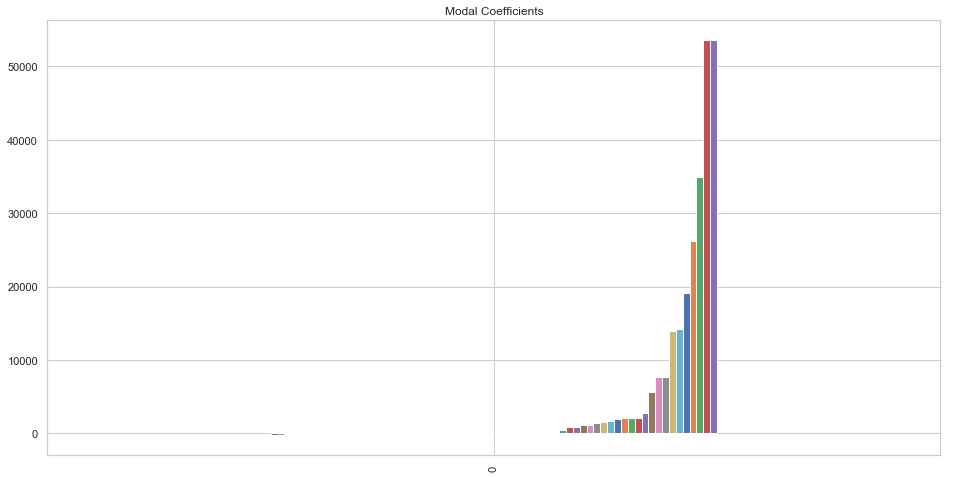

In [19]:
## training the model

ridgeReg_5 = Ridge(alpha=5, normalize=True)

ridgeReg_5.fit(X_train2,y_train2)

y_pred_ridge_5 = ridgeReg_5.predict(X_test2)

RMSE_R5 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_5))

# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', RMSE_R5)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
ridge_coef_5 = pd.DataFrame(data=ridgeReg_5.coef_).T
ridge_coef_5.columns = X_test2.columns
ridge_coef_5 = ridge_coef_5.T.sort_values(by=0).T
ridge_coef_5.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [20]:
ridge_coef_5

,bedrooms,condition,bedrooms condition,bedrooms^2,condition^2,sqft_lot yr_old,sqft_lot sqft_basement,sqft_lot^2,sqft_living sqft_lot,sqft_lot condition,bedrooms sqft_lot,sqft_living^2,sqft_lot grade,sqft_living sqft_basement,sqft_basement^2,bathrooms sqft_lot,sqft_lot,sqft_lot floors,sqft_basement yr_old,sqft_living yr_old,sqft_lot waterfront,bedrooms sqft_basement,yr_old^2,grade sqft_basement,condition sqft_basement,sqft_living grade,bedrooms sqft_living,bathrooms sqft_living,sqft_living condition,bathrooms sqft_basement,sqft_living floors,sqft_basement,floors sqft_basement,sqft_living,bedrooms yr_old,condition yr_old,sqft_living waterfront,grade yr_old,waterfront sqft_basement,bathrooms yr_old,yr_old,floors yr_old,waterfront yr_old,bedrooms grade,grade^2,bedrooms bathrooms,bedrooms floors,bathrooms grade,floors^2,floors grade,condition grade,bathrooms condition,floors condition,bathrooms^2,bathrooms floors,floors,bathrooms,waterfront grade,grade,waterfront condition,bedrooms waterfront,bathrooms waterfront,floors waterfront,waterfront^2,waterfront
0,-292.390569,-227.88105,-59.172478,-31.622743,-19.388395,-0.000125,-0.000041,6.870016e-09,0.000013,0.001527,0.001671,0.002954,0.004036,0.004357,0.006354,0.008915,0.0116,0.013132,0.095244,0.146139,0.210447,1.176832,1.3193,1.448978,1.528913,1.58907,1.952335,3.213321,3.625813,4.056825,5.218747,6.033927,8.794722,13.779725,22.668734,23.133368,25.08487,33.333218,62.473076,96.112972,102.655708,124.653844,472.711659,843.617064,916.952196,1083.62575,1188.791776,1416.738104,1588.565628,1629.81728,1959.009387,2013.505491,2014.933164,2115.790256,2790.344516,5623.82001,7623.921318,7676.922641,13971.928122,14202.353399,19059.442222,26200.200934,34935.676864,53597.961803,53597.961803


In [21]:
print(test_rmse2, RMSE_R01, RMSE_R1, RMSE_R5)

203809.95102128174 216531.56788767173 234771.97343258912 268809.22504888434


In [22]:
ridge_coefs =  pd.concat([ridge_coef_01, ridge_coef_1, ridge_coef_5], sort=True)
ridge_coefs.abs()

,bathrooms,bathrooms condition,bathrooms floors,bathrooms grade,bathrooms sqft_basement,bathrooms sqft_living,bathrooms sqft_lot,bathrooms waterfront,bathrooms yr_old,bathrooms^2,bedrooms,bedrooms bathrooms,bedrooms condition,bedrooms floors,bedrooms grade,bedrooms sqft_basement,bedrooms sqft_living,bedrooms sqft_lot,bedrooms waterfront,bedrooms yr_old,bedrooms^2,condition,condition grade,condition sqft_basement,condition yr_old,condition^2,floors,floors condition,floors grade,floors sqft_basement,floors waterfront,floors yr_old,floors^2,grade,grade sqft_basement,grade yr_old,grade^2,sqft_basement,sqft_basement yr_old,sqft_basement^2,sqft_living,sqft_living condition,sqft_living floors,sqft_living grade,sqft_living sqft_basement,sqft_living sqft_lot,sqft_living waterfront,sqft_living yr_old,sqft_living^2,sqft_lot,sqft_lot condition,sqft_lot floors,sqft_lot grade,sqft_lot sqft_basement,sqft_lot waterfront,sqft_lot yr_old,sqft_lot^2,waterfront,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_old,waterfront^2,yr_old,yr_old^2
0,13618.576518,88.802965,114.814157,3747.508837,6.440297,7.653840,0.059537,49229.500623,47.427685,3143.134108,26259.821221,1118.287755,2414.488661,4961.760076,1379.307126,5.561500,1.600782,0.038621,41109.941389,109.863155,627.460220,11492.754710,5250.869892,0.310888,69.026404,958.948415,7227.512229,45.536849,2822.601223,16.869658,2390.018588,142.282961,7969.685661,26992.917757,5.866738,128.001640,2914.316273,20.437080,0.254170,0.035069,1.452653,4.996774,2.346649,4.273471,0.011506,0.000059,114.836814,0.434564,0.009582,0.158236,0.030716,0.052869,0.010837,0.000468,0.709676,0.003017,3.846037e-07,6210.778366,15301.287180,11919.368516,59.037237,1886.087683,6210.778366,358.393004,7.615821
0,3248.831764,820.768253,2119.019040,2184.887642,4.168644,4.916886,0.007655,39557.769902,107.383402,2337.177732,9871.627851,1.809109,1769.561021,1085.372563,1021.510207,0.952362,2.234291,0.012351,25971.188894,37.241696,223.575870,3473.411148,3543.955043,0.291355,56.576940,405.213295,1579.895727,617.639187,2486.705268,9.890172,41149.168586,187.372098,1326.395233,26237.241670,1.924231,76.575090,1823.003600,1.046478,0.026354,0.001453,18.014448,4.866061,6.988396,2.755986,0.006041,0.000003,46.629181,0.242387,0.005173,0.009105,0.002112,0.005152,0.004587,0.000258,0.243766,0.000287,7.640749e-08,49225.521014,13360.162447,10443.127292,97.065432,217.572150,49225.521014,284.154858,3.554043
0,7623.921318,2013.505491,2790.344516,1416.738104,4.056825,3.213321,0.008915,26200.200934,96.112972,2115.790256,292.390569,1083.625750,59.172478,1188.791776,843.617064,1.176832,1.952335,0.001671,19059.442222,22.668734,31.622743,227.881050,1959.009387,1.528913,23.133368,19.388395,5623.820010,2014.933164,1629.817280,8.794722,34935.676864,124.653844,1588.565628,13971.928122,1.448978,33.333218,916.952196,6.033927,0.095244,0.006354,13.779725,3.625813,5.218747,1.589070,0.004357,0.000013,25.084870,0.146139,0.002954,0.011600,0.001527,0.013132,0.004036,0.000041,0.210447,0.000125,6.870016e-09,53597.961803,14202.353399,7676.922641,62.473076,472.711659,53597.961803,102.655708,1.319300


**Important Points:**
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique.


**Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

RMSE: 204086.0289662524


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


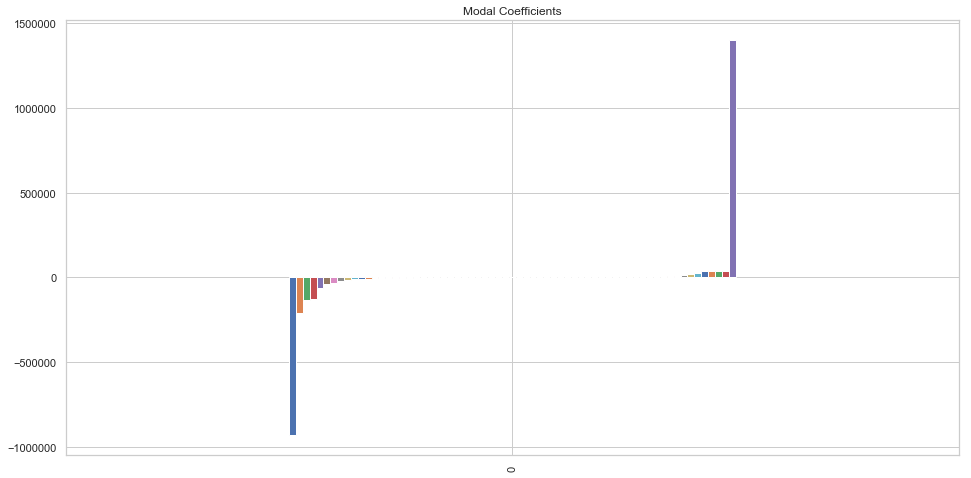

In [23]:
## training the model
from sklearn.linear_model import Lasso


lassoReg01 = Lasso(alpha=0.1, normalize=True)

lassoReg01.fit(X_train2,y_train2)

y_pred_lasso01 = lassoReg01.predict(X_test2)

#calculating Rmse
RMSE_L01 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso01))

# print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso01)))
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())

lasso_coef01 = pd.DataFrame(data=lassoReg01.coef_).T
lasso_coef01.columns = X_test2.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))



In [24]:
lasso_coef01

,waterfront^2,bathrooms,grade,floors waterfront,waterfront grade,condition,floors,bathrooms^2,bathrooms floors,bedrooms condition,yr_old,floors grade,waterfront yr_old,bedrooms grade,bedrooms floors,condition^2,floors yr_old,bathrooms yr_old,sqft_living,waterfront sqft_basement,sqft_basement,bedrooms sqft_basement,sqft_living floors,bedrooms sqft_living,bathrooms sqft_living,sqft_lot waterfront,sqft_basement yr_old,sqft_basement^2,bathrooms sqft_lot,sqft_lot grade,sqft_lot yr_old,sqft_living sqft_basement,sqft_living sqft_lot,sqft_lot sqft_basement,sqft_lot^2,bedrooms sqft_lot,sqft_living^2,sqft_lot condition,sqft_lot floors,sqft_living yr_old,sqft_lot,condition sqft_basement,bathrooms sqft_basement,sqft_living grade,floors sqft_basement,yr_old^2,grade sqft_basement,sqft_living condition,condition yr_old,sqft_living waterfront,bedrooms yr_old,grade yr_old,bedrooms^2,bedrooms,condition grade,grade^2,bathrooms condition,floors condition,bedrooms bathrooms,bathrooms waterfront,waterfront condition,bathrooms grade,floors^2,bedrooms waterfront,waterfront
0,-930753.473354,-211912.904202,-135296.033728,-127223.071724,-59954.030019,-40930.346996,-31938.578969,-19891.826602,-13877.74346,-10108.415706,-6717.05952,-6077.651382,-3855.287394,-3776.033723,-3369.174996,-2527.565754,-1202.166604,-591.008581,-144.112624,-105.322644,-80.642143,-16.625874,-7.643725,-7.101398,-4.607394,-1.014271,-0.477871,-0.095804,-0.072057,-0.05058,-0.017733,-0.002507,-0.000375,-0.000179,7.371765e-07,0.004178,0.018308,0.027257,0.065147,0.715131,1.60211,2.650013,8.913025,14.750039,16.030365,21.005017,28.144173,30.51632,179.007348,288.738154,380.477419,995.980497,1146.891369,1256.263464,2209.873763,6993.524816,7273.340283,15064.121939,21748.420958,26652.554185,36934.25161,38112.629566,40834.693561,41022.135853,1.399153e+06


RMSE: 203890.5305207812


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


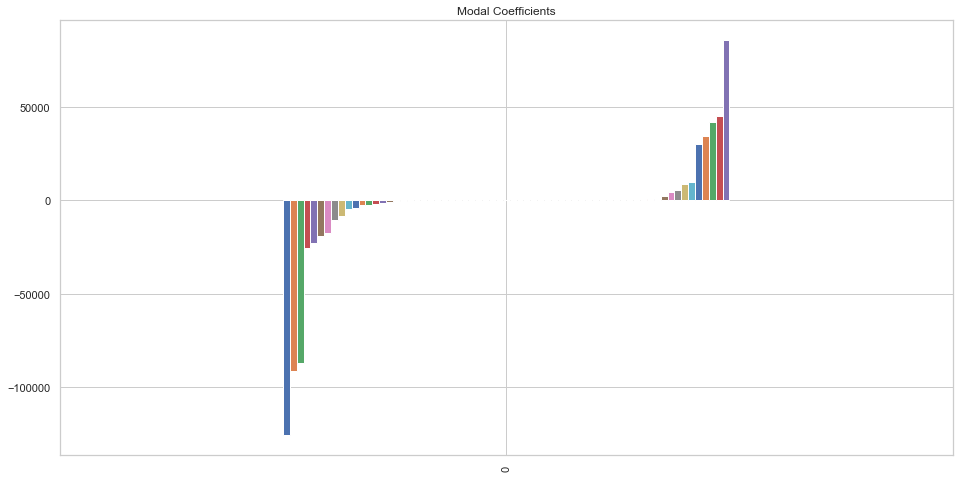

In [26]:
## training the model
from sklearn.linear_model import Lasso


lassoReg1 = Lasso(alpha=1, normalize=True)

lassoReg1.fit(X_train2,y_train2)

y_pred_lasso1 = lassoReg1.predict(X_test2)

#calculating mse
RMSE_L1 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso1))

# print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso1)))
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())

lasso_coef1 = pd.DataFrame(data=lassoReg1.coef_).T
lasso_coef1.columns = X_test2.columns
lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))


In [27]:
lasso_coef1

,bathrooms,floors waterfront,grade,bathrooms floors,floors,waterfront grade,condition,bedrooms,bathrooms^2,bedrooms condition,yr_old,bedrooms grade,waterfront yr_old,condition^2,floors yr_old,floors grade,bathrooms yr_old,sqft_living,waterfront sqft_basement,sqft_basement,bedrooms sqft_basement,sqft_living floors,bathrooms sqft_living,sqft_lot waterfront,sqft_basement yr_old,bathrooms sqft_lot,sqft_basement^2,sqft_lot yr_old,sqft_living sqft_lot,sqft_lot sqft_basement,bedrooms floors,sqft_lot grade,sqft_lot floors,condition yr_old,condition sqft_basement,bedrooms sqft_living,bathrooms condition,bedrooms sqft_lot,sqft_lot^2,sqft_living sqft_basement,sqft_living^2,sqft_lot condition,sqft_living yr_old,bathrooms sqft_basement,sqft_lot,floors sqft_basement,sqft_living grade,yr_old^2,grade sqft_basement,sqft_living condition,condition grade,bedrooms yr_old,sqft_living waterfront,grade yr_old,bedrooms^2,bathrooms waterfront,waterfront^2,grade^2,bedrooms bathrooms,floors condition,bathrooms grade,floors^2,waterfront condition,bedrooms waterfront,waterfront
0,-125800.509453,-91248.906083,-87250.058042,-25598.465318,-22575.803344,-19054.321706,-17376.616408,-10570.882676,-8174.093739,-4755.33596,-4307.349916,-2773.11499,-2711.43766,-1929.707791,-1183.279324,-1127.56336,-413.538188,-185.750424,-70.266168,-70.038282,-14.624855,-2.666681,-1.278684,-0.893781,-0.470093,-0.108809,-0.095646,-0.015784,-0.000353,-0.000204,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,6.917441e-07,0.00001,0.015978,0.020745,0.807087,1.247635,1.303825,10.1553,15.243582,18.893716,29.791762,31.372935,167.625518,241.887414,259.196702,775.368306,959.972107,2462.008543,4188.875814,5303.453305,8828.328027,9983.586625,29998.74918,34426.37485,41844.148453,45102.478404,85755.027908


RMSE: 208028.77896189905


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


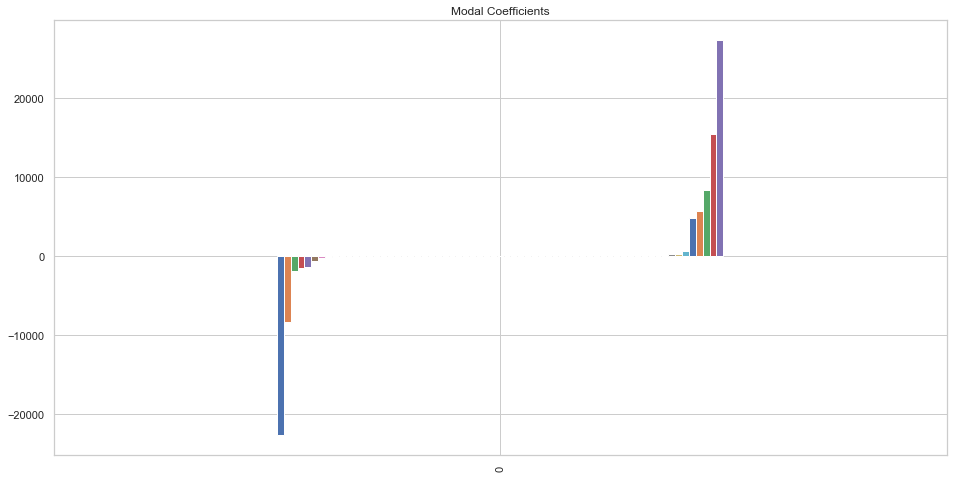

In [29]:
## training the model
from sklearn.linear_model import Lasso


lassoReg5 = Lasso(alpha=5, normalize=True)

lassoReg5.fit(X_train2,y_train2)

y_pred_lasso5 = lassoReg5.predict(X_test2)

#calculating mse

RMSE_L5 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso5))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso5)))

lasso_coef5 = pd.DataFrame(data=lassoReg5.coef_).T
lasso_coef5.columns = X_test2.columns
lasso_coef5 = lasso_coef5.T.sort_values(by=0).T
lasso_coef5.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [30]:
lasso_coef5

,bedrooms,floors waterfront,bathrooms,waterfront yr_old,condition,floors yr_old,bathrooms yr_old,sqft_living,sqft_basement,sqft_living floors,bedrooms sqft_basement,sqft_lot waterfront,sqft_basement yr_old,sqft_basement^2,sqft_lot yr_old,sqft_lot sqft_basement,sqft_living sqft_lot,sqft_lot grade,sqft_lot floors,waterfront sqft_basement,sqft_living sqft_basement,floors condition,condition^2,floors grade,floors sqft_basement,sqft_lot condition,bathrooms sqft_basement,bathrooms condition,waterfront^2,floors,waterfront,grade,yr_old,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,condition yr_old,condition grade,bedrooms condition,condition sqft_basement,bathrooms^2,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bedrooms grade,waterfront grade,sqft_lot^2,sqft_living^2,sqft_lot,sqft_living yr_old,bathrooms sqft_living,yr_old^2,sqft_living grade,sqft_living condition,bedrooms yr_old,grade sqft_basement,grade yr_old,sqft_living waterfront,bedrooms^2,grade^2,bathrooms grade,waterfront condition,floors^2,bedrooms waterfront
0,-22697.820158,-8326.851661,-1978.120096,-1586.710654,-1472.370453,-630.206395,-226.52781,-139.739983,-75.125093,-3.91947,-3.458226,-0.642702,-0.402293,-0.086363,-0.00895,-0.00031,-0.000276,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,5.525336e-07,0.019381,0.705938,0.991697,3.863937,11.914591,11.921194,14.83276,19.150806,26.939624,198.984901,213.872135,649.122434,4797.783752,5618.982502,8366.409122,15416.446633,27274.543386


In [31]:
print(test_rmse2, RMSE_L01, RMSE_L1, RMSE_L5)

203809.95102128174 204086.0289662524 203890.5305207812 208028.77896189905


In [32]:
lasso_coefs =  pd.concat([lasso_coef01, lasso_coef1, lasso_coef5], sort=True)

In [34]:
lasso_coefs.abs().sum(axis=1)

0    3.250741e+06
0    6.976031e+05
0    9.976848e+04
dtype: float64

Finally to end this meditation, let’s summarize what we have learnt so far

1. Cost function of Ridge and Lasso regression and importance of regularization term.
2. Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.
Understood why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.